# Загрузка Pandas и очистка данных

In [129]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np  # для работы с массивами
import pandas as pd  # для работы с DataFrame
import ast  # для использования literal_eval
import os
import cufflinks as cf
from IPython.display import display, HTML

%matplotlib inline
from matplotlib import pyplot as plt
# множественный вывод из одной ячейки
InteractiveShell.ast_node_interactivity = "all"

# pd.options.display.max_rows=105
pd.options.display.max_columns = 250

# default='warn' - отключить некоторые уведомления Пайтона
pd.options.mode.chained_assignment = None

In [71]:
# читаем датасет
dataset_dir = 'C:/Users/lvd/Desktop/Data Science/Python study/projects/module_3/datasets/tripadvisor/'

df_1 = pd.read_csv(dataset_dir+'kaggle_task.csv')
df_2 = pd.read_csv(dataset_dir+'main_task_new.csv')

In [72]:
# в дальнейшем я планирую соединить оба файла - для этого введу параметр kaggle - чтобы потом отличить откуда - какое значение
df_1['kaggle'] = 1
df_2['kaggle'] = 0
df_1.head(2)
df_2.head(2)
df_1.info()
df_2.info

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,kaggle
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,1


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,kaggle
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
 9   kaggle             10000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


<bound method DataFrame.info of       Restaurant_id       City  \
0           id_5569      Paris   
1           id_1535  Stockholm   
2            id_352     London   
3           id_3456     Berlin   
4            id_615     Munich   
...             ...        ...   
39995        id_499      Milan   
39996       id_6340      Paris   
39997       id_1649  Stockholm   
39998        id_640     Warsaw   
39999       id_4824      Milan   

                                           Cuisine Style  Ranking  Rating  \
0                ['European', 'French', 'International']   5570.0     3.5   
1                                                    NaN   1537.0     4.0   
2      ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...    353.0     4.5   
3                                                    NaN   3458.0     5.0   
4      ['German', 'Central European', 'Vegetarian Fri...    621.0     4.0   
...                                                  ...      ...     ...   
39995  ['Italian', '

In [73]:
# в kaggle.csv нет колонки RAting - заполним нулями
df_1['Rating'] = 0

In [74]:
# объединим их в один датафрейм df, reset_index, корректируем названия столбцов
df = pd.concat([df_1, df_2])
df = df.reset_index(drop=True)
df.columns
df.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking',
              'price_range', 'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA', 'kaggle', 'rating']

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'kaggle', 'Rating'],
      dtype='object')

In [99]:
# functions and procedures for organizing data

def review2list(string):  # transform review from string to list, transform date to_datetime
    if string == '[[], []]':
        string = [None, None, None, None]
        return None

    string1 = []
    if isinstance(string, str):
        string = string.replace('[', '').replace(
            ']', '').replace("'", '').split(',')

        for item in string:
            date_format = '%m/%d/%Y'

            try:
                item = pd.to_datetime(item[1:], format=date_format)
                string1.append(item)
            except ValueError:
                string1.append(item)
            except TypeError:
                string1.append(item)

            else:
                None
            finally:
                string1

    return string1

# функция возвращает из словаря цифровые значения для признака дороговизны ресторана


def dollar2rating(x):  # convert $$ to 0-1-2
    dict = {0: 0, '$': 1, '$$ - $$$': 2, '$$$$': 3}

    try:
        return dict[x]
    except KeyError:
        print(x)


# was made for cleaning initial column, but now just get_dummies and concatinate
def make_dummies(dframe, column):
    _col = pd.get_dummies(dframe[column], drop_first=False)
    return pd.concat([dframe, _col], axis=1)

# функция возвращает кол-во разных кухонь, представленных в городе


def kitchen_in_city_(city):

    return kitchen_in_city[city]

# функция возвращает слово без симоволов-паразитов


def clear_word(word):
    bad_sign = ['!', '@', '&', '+', '-', '/', '.', '.', ',',
                '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', ':', '(', ')', '%', '*', '?', '"', '=']

    for sign in bad_sign:
        count = 0
        if sign in word:
            word = word.replace(sign, '')
            word = clear_word(word)
    return word

# делаем из списка кортежей множество слов, без частоты


def count2list(spisok):
    a = []
    for word in spisok:
        a.append(word[0])
    return set(a)

# возвращает датасет без выбросов параметра param считая выбросы отдельно для выборки по параметру iterby


def list_outliers(data, iterby='city', param='rating'):
    droplist = []
    for item in list(set(data[iterby])):
        df2 = data[data[iterby] == item][param]
        median = df2.median()
        q1 = df2.quantile(q=0.25)
        q3 = df2.quantile(q=0.75)
        iqr = q3-q1
        lb = q1-1.5*iqr
        hb = q3+1.5*iqr
        droplist += list(df2[(df2 < lb) | (df2 > hb)].index)
    return droplist

# функция возвращает сколько слов из списка в отзывах


def word_in_list(review, spisok):
    count = 0
    if type(review) == list:
        for info in review[0:-2]:
            if isinstance(info, str):
                for word in info.split(' '):
                    if clear_word(word.lower()) in spisok:
                        count += 1

    return count

# plot one hist to check outliers closer or just to look deeper

# tit - hist title
# rhb - reviewed highest border in 'Здравый смысл'
# rlb - reviewed lowest border in 'Здравый смысл'
# one of rhb or rlb could be missed

def hist_check(dth, b, tit, rhb=None, rlb=None):
    IQR = dth.quantile(0.75) - dth.quantile(0.25)
    perc25 = dth.quantile(0.25)
    perc75 = dth.quantile(0.75)
    lb = perc25 - 1.5*IQR
    hb = perc75 + 1.5*IQR

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{lb}, {hb}].".format(lb=lb, hb=hb))

    fig = plt.figure()
    dth.loc[dth.between(
        lb,
        hb)].hist(bins=b, label='IQR')

    if rlb != None and rhb != None:
        dth.loc[(rlb <= dth) & (dth <= rhb)].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')
    elif pd.isnull(rlb) and rhb != None:
        dth.loc[dth <= rhb].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')
    elif pd.isnull(rhb) and rlb != None:
        dth.loc[rlb <= dth].hist(
            alpha=0.5, bins=b,  label='Здравый смысл')

    plt.legend()
    plt.title(tit)
    return [lb, hb]

# hist function
# plots all hists together to have a look in general

# features - list of columns to plot
# rows, cols - number of rows & cols for hists
# fg1,2 - figure size
# b - number of bins per hist
def histograms_plot(dataframe, features, rows, cols, fg1, fg2, b):
    fig = plt.figure(figsize=(fg1, fg2))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=b, ax=ax, facecolor='blue')
        ax.set_title(feature+" distribution", color='#1D0772')

        fig.tight_layout()
    plt.show()

In [76]:
df.sample(2)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,kaggle,rating
39850,id_4767,Paris,"['French', 'Steakhouse', 'Barbecue', 'Grill']",4768.0,$$ - $$$,19.0,"[['Early dinner after Paris landing', 'Restaur...",/Restaurant_Review-g187147-d3403754-Reviews-Hi...,d3403754,0,4.0
13793,id_1240,Lyon,"['Italian', 'Pizza', 'Vegetarian Friendly']",1241.0,$$ - $$$,122.0,"[['average', 'Best pizza'], ['03/08/2017', '02...",/Restaurant_Review-g187265-d4197472-Reviews-Sp...,d4197472,0,4.0


<AxesSubplot:>

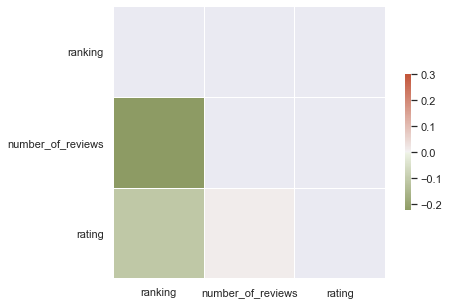

In [77]:
# посмотрим на исходное состояние скоррелированности данных
# Compute the correlation matrix
corr = df.drop('kaggle', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# как мы видим исходные данные показывают лишь оч. слабую связь с кол-вом отзывов - 
# что разумно. популярное заведение, скорее всего хорошее и имеет много отзывов

# mask = np.triu(np.ones_like(corr, dtype=float))
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [78]:
# кухни приводим к списку, если нет информации о кухне - None
df.cuisine_style = df.cuisine_style.fillna('None')
df.cuisine_style = df.cuisine_style.apply(ast.literal_eval)
df.reviews = df.reviews.apply(lambda x: review2list(x))

In [79]:
# если в поле ревью нет информации - признак review_is_nan 1/0
# если в поле number_of_reviews нет информации - поле rev_num_is_nan =1/0
df['rev_num_is_nan'] = pd.isna(df.number_of_reviews).astype('uint8')
df['review_is_nan'] = pd.isna(df.reviews).astype('uint8')

In [80]:
# делаем список - [город, кол-во кухонь]
df_test = df[['cuisine_style', 'city']]
df_test = df_test.explode('cuisine_style')
kitchen_in_city = df_test.groupby(by='city')['cuisine_style'].nunique()

# заполняем стобец "кол-во кухонь, представленных в городе"
df['kitchens_in_city'] = df.city.apply(kitchen_in_city_)

In [81]:
# процедура, которая заполняет столбец between значением дней между последними двумя отзывами
# № заполняет столбец с датой последнего отзыва
# заполняет столбец с днём недели последнего отзыва

df['between'] = 0  # создем столбец between, значение по-умолчанию =0
df['last_review'] = 0
df['last_review_weekday'] = 0
for x in range(df.reviews.shape[0]):
    try:
        df.between.iloc[x] = abs(df.reviews[x][-1]-df.reviews[x][-2]).days
        df.last_review[x] = df.reviews[x][-1]
        df.last_review_weekday[x] = df.last_review[x].weekday()+1
    except TypeError:
        df.between.iloc[x] = 0
    except IndexError:
        df.between.iloc[x] = 0

In [82]:
# меняем доллары на 0-1-2
df.price_range = df.price_range.fillna(0)
df.price_range = df.price_range.apply(dollar2rating)

In [83]:
df.sample(5)
corr = df.drop('kaggle', axis=1).corr()
# df.price_range.Dtype=

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,kaggle,rating,rev_num_is_nan,review_is_nan,kitchens_in_city,between,last_review,last_review_weekday
31894,id_1040,Munich,[Vegetarian Friendly],1050.0,2,27.0,"[Absolutely yummy elegance, Very creative veg...",/Restaurant_Review-g187309-d7153029-Reviews-Pr...,d7153029,0,4.0,0,0,77,524,2016-02-14 00:00:00,7
8553,id_8553,Copenhagen,"[Japanese, Sushi, Asian, Seafood]",900.0,2,27.0,"[So good, Excellent Sushi, 2017-10-12 00:00:0...",/Restaurant_Review-g189541-d942117-Reviews-Sac...,d942117,1,0.0,0,0,76,75,2017-12-26 00:00:00,2
38853,id_346,Madrid,"[Mediterranean, European, Spanish, Vegetarian ...",347.0,2,270.0,"[Good restaurant with attentive service, Favo...",/Restaurant_Review-g187514-d9584882-Reviews-Ha...,d9584882,0,4.5,0,0,93,23,2017-12-14 00:00:00,4
33475,id_1152,Krakow,None,1153.0,0,2.0,None,/Restaurant_Review-g274772-d11982214-Reviews-C...,d11982214,0,3.0,0,1,65,0,0,0
3824,id_3824,Athens,"[International, Greek]",1031.0,0,NaN,None,/Restaurant_Review-g189400-d10319682-Reviews-C...,d10319682,1,0.0,1,1,63,0,0,0


<AxesSubplot:>

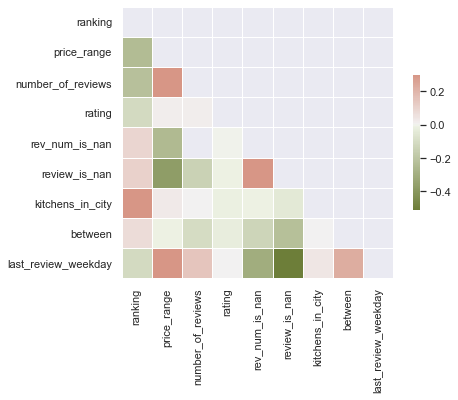

In [84]:
corr = df.drop('kaggle', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# новых корреляций не появилось с рейтингом

In [85]:
# dummie variabes for cuisine type, из списка
df1 = pd.DataFrame()
df1 = pd.DataFrame(df.cuisine_style)
s = df1['cuisine_style']
dummy_dat = pd.get_dummies(
    s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
df = pd.concat([df, dummy_dat], axis=1)
# делаем дурацкие переменные для города
df = make_dummies(df, 'city')

In [86]:
df = make_dummies(df, 'last_review_weekday')

In [87]:
# считаем слова в отличных отзывах в словарь
# перебираем все отзывы с рейтингом 4-5, текстовую часть разбиваем на слова(и считаем кол-во слов)

import operator
perf_word = {}
test = df[(df.rating >= 4) & (df.rating <= 5)]

for ind in test.reviews:
    if type(ind) == list:
        for post in ind[0:-2]:
            if isinstance(post, str):
                for word in post.split(' '):
                    word = clear_word(word.lower())
                    if word not in perf_word:
                        perf_word[word.lower()] = 1
                    else:
                        perf_word[word.lower()] += 1

# создаем спискок кортежей с словом и частотой упоминанияЮ, отсортированные по частоте
good_word = sorted(perf_word.items(), key=operator.itemgetter(1))

# считаем слова в плохих отзывах в словарь
perf_word = {}
test = df[(df.rating >= 1) & (df.rating <= 2)]
for ind in test.reviews:
    if type(ind) == list:
        for post in ind[0:-2]:
            if isinstance(post, str):
                for word in post.split(' '):
                    word = clear_word(word.lower())
                    if word not in perf_word:
                        perf_word[word.lower()] = 1
                    else:
                        perf_word[word.lower()] += 1


# создаем спискок кортежей с словом и частотой упоминанияЮ, отсортированные по частоте
bad_word = sorted(perf_word.items(), key=operator.itemgetter(1))

# счтаем минимальное кол-во слов в списках хороших и плохих слов
how_many_words = round(min([len(good_word), len(bad_word)])/2)

# обрезаем списки до половины минимального кол-ва слов в списках с конца, т.е. получаем слова с большей частотой
bad_word = bad_word[how_many_words:]  #
good_word = good_word[how_many_words:]

# делаем из списка кортежей множество слов, без частоты


def count2list(spisok):
    a = []
    for word in spisok:
        a.append(word[0])
    return set(a)


good_word = count2list(good_word)
bad_word = count2list(bad_word)

# из множества хороших слов убираем слова из 'плохого' множества и наоборот. превращаем в списко
bad = list(bad_word-good_word)
good = list(good_word-bad_word)

In [88]:
# заполняем столбец гуд и бэд кол-вом хороших и плохих слов в отзывах
df['good'] = df.reviews.apply(lambda x: word_in_list(x, good))
df['bad'] = df.reviews.apply(lambda x: word_in_list(x, bad))

In [89]:
city_list = set(df.city)  # сет городов
city_list = list(city_list)  # делаем списком

# словарь с внешними данными - кол-во жителей в городе

city_population = {'Bratislava': 424,
                   'Milan': 3200,
                   'Madrid': 3266,
                   'Amsterdam': 872,
                   'Ljubljana': 508,
                   'Dublin': 1173,
                   'Geneva': 200,
                   'Krakow': 766,
                   'Hamburg': 1841,
                   'Lisbon': 504,
                   'Zurich': 402,
                   'Copenhagen': 602,
                   'Vienna': 1897,
                   'Prague': 1309,
                   'Lyon': 513,
                   'Edinburgh': 482,
                   'London': 8982,
                   'Stockholm': 975,
                   'Barcelona': 1620,
                   'Brussels': 174,
                   'Athens': 664,
                   'Paris': 2161,
                   'Berlin': 3645,
                   'Rome': 2873,
                   'Helsinki': 631,
                   'Munich': 1472,
                   'Luxembourg': 632,
                   'Budapest': 1756,
                   'Oslo': 634,
                   'Oporto': 214,
                   'Warsaw': 1765}

# считаем сколько в городе ресторанов

city_count = {}
for gorod in city_list:
    city_count[gorod] = df[df.city == gorod]['ID_TA'].nunique()

In [90]:
# заполняем таблицу кол-вом жителей города
df['population'] = 0
for city in city_list:
    df['population'][df.city == city] = city_population[city]

In [91]:
# ввожу относительный рейтинг (учитываю кол-во ресторанов в городе в датасете)
# для этого указыавю столбец кол-во ресторанов в городе

df['rest_in_city'] = df.city.apply(lambda x: city_count[x])
df['relative_ranking'] = df.rest_in_city/df.ranking

In [92]:
# ввожу еще один признак - сколько ресторанов в сети
rest_in_chain = df.restaurant_id.value_counts()

# функция возвращает кол-во ресторанов с таким-же restaurant_id


def is_chain(id):
    return rest_in_chain[id]


df['chain'] = df.restaurant_id.apply(lambda x: is_chain(x))

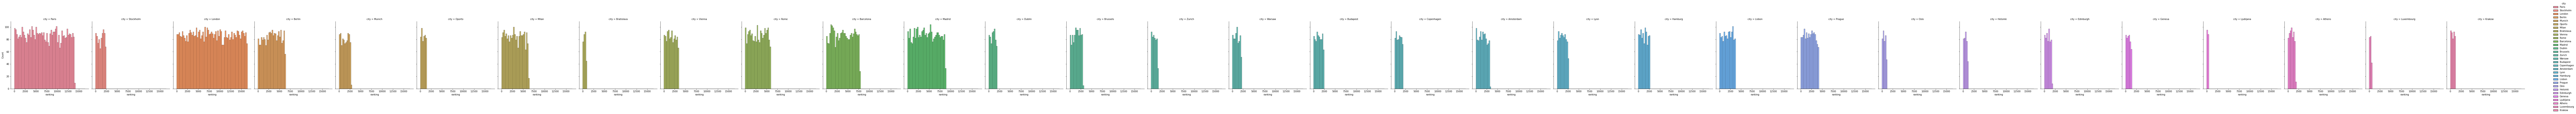

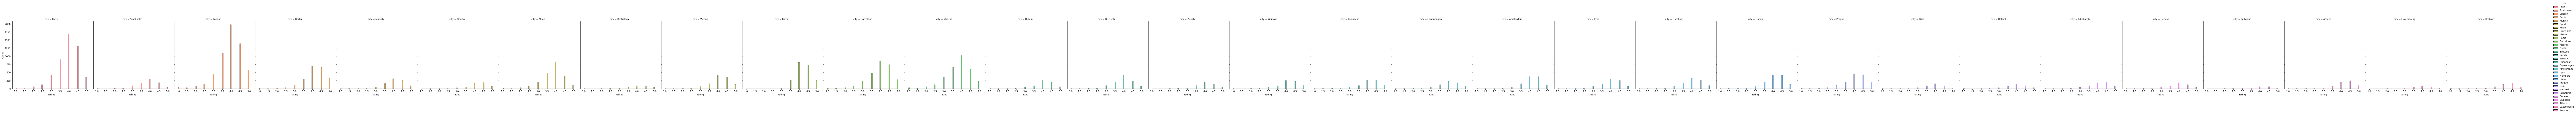

In [20]:
import seaborn as sns
df_show = df[df.kaggle == 0]

# распределение в ранкинге - равное
sns.displot(data=df_show, x="ranking", hue="city", col="city")
# распределение в рейтинге - нормальное
sns.displot(data=df_show, x="rating", hue="city", col="city")

# анализ графиков показывает, что рецтинг распределен нормально, а рэнкинг равномерно

<AxesSubplot:xlabel='city', ylabel='rating'>

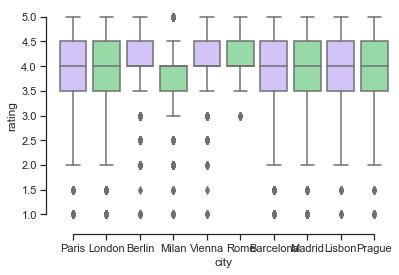

In [21]:
# посмотрим на боксплоты рейтинга.рэнка по городам

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="city", y="rating",
            palette=["m", "g"],
            data=df_show[df_show.city.isin(df.city.value_counts()[0:10].index)])
sns.despine(offset=10, trim=True)
# вывод - у рейтинга есть выбросы и я уберу их для каждого города отдельно, это положительно сказывается на MAE

<AxesSubplot:>

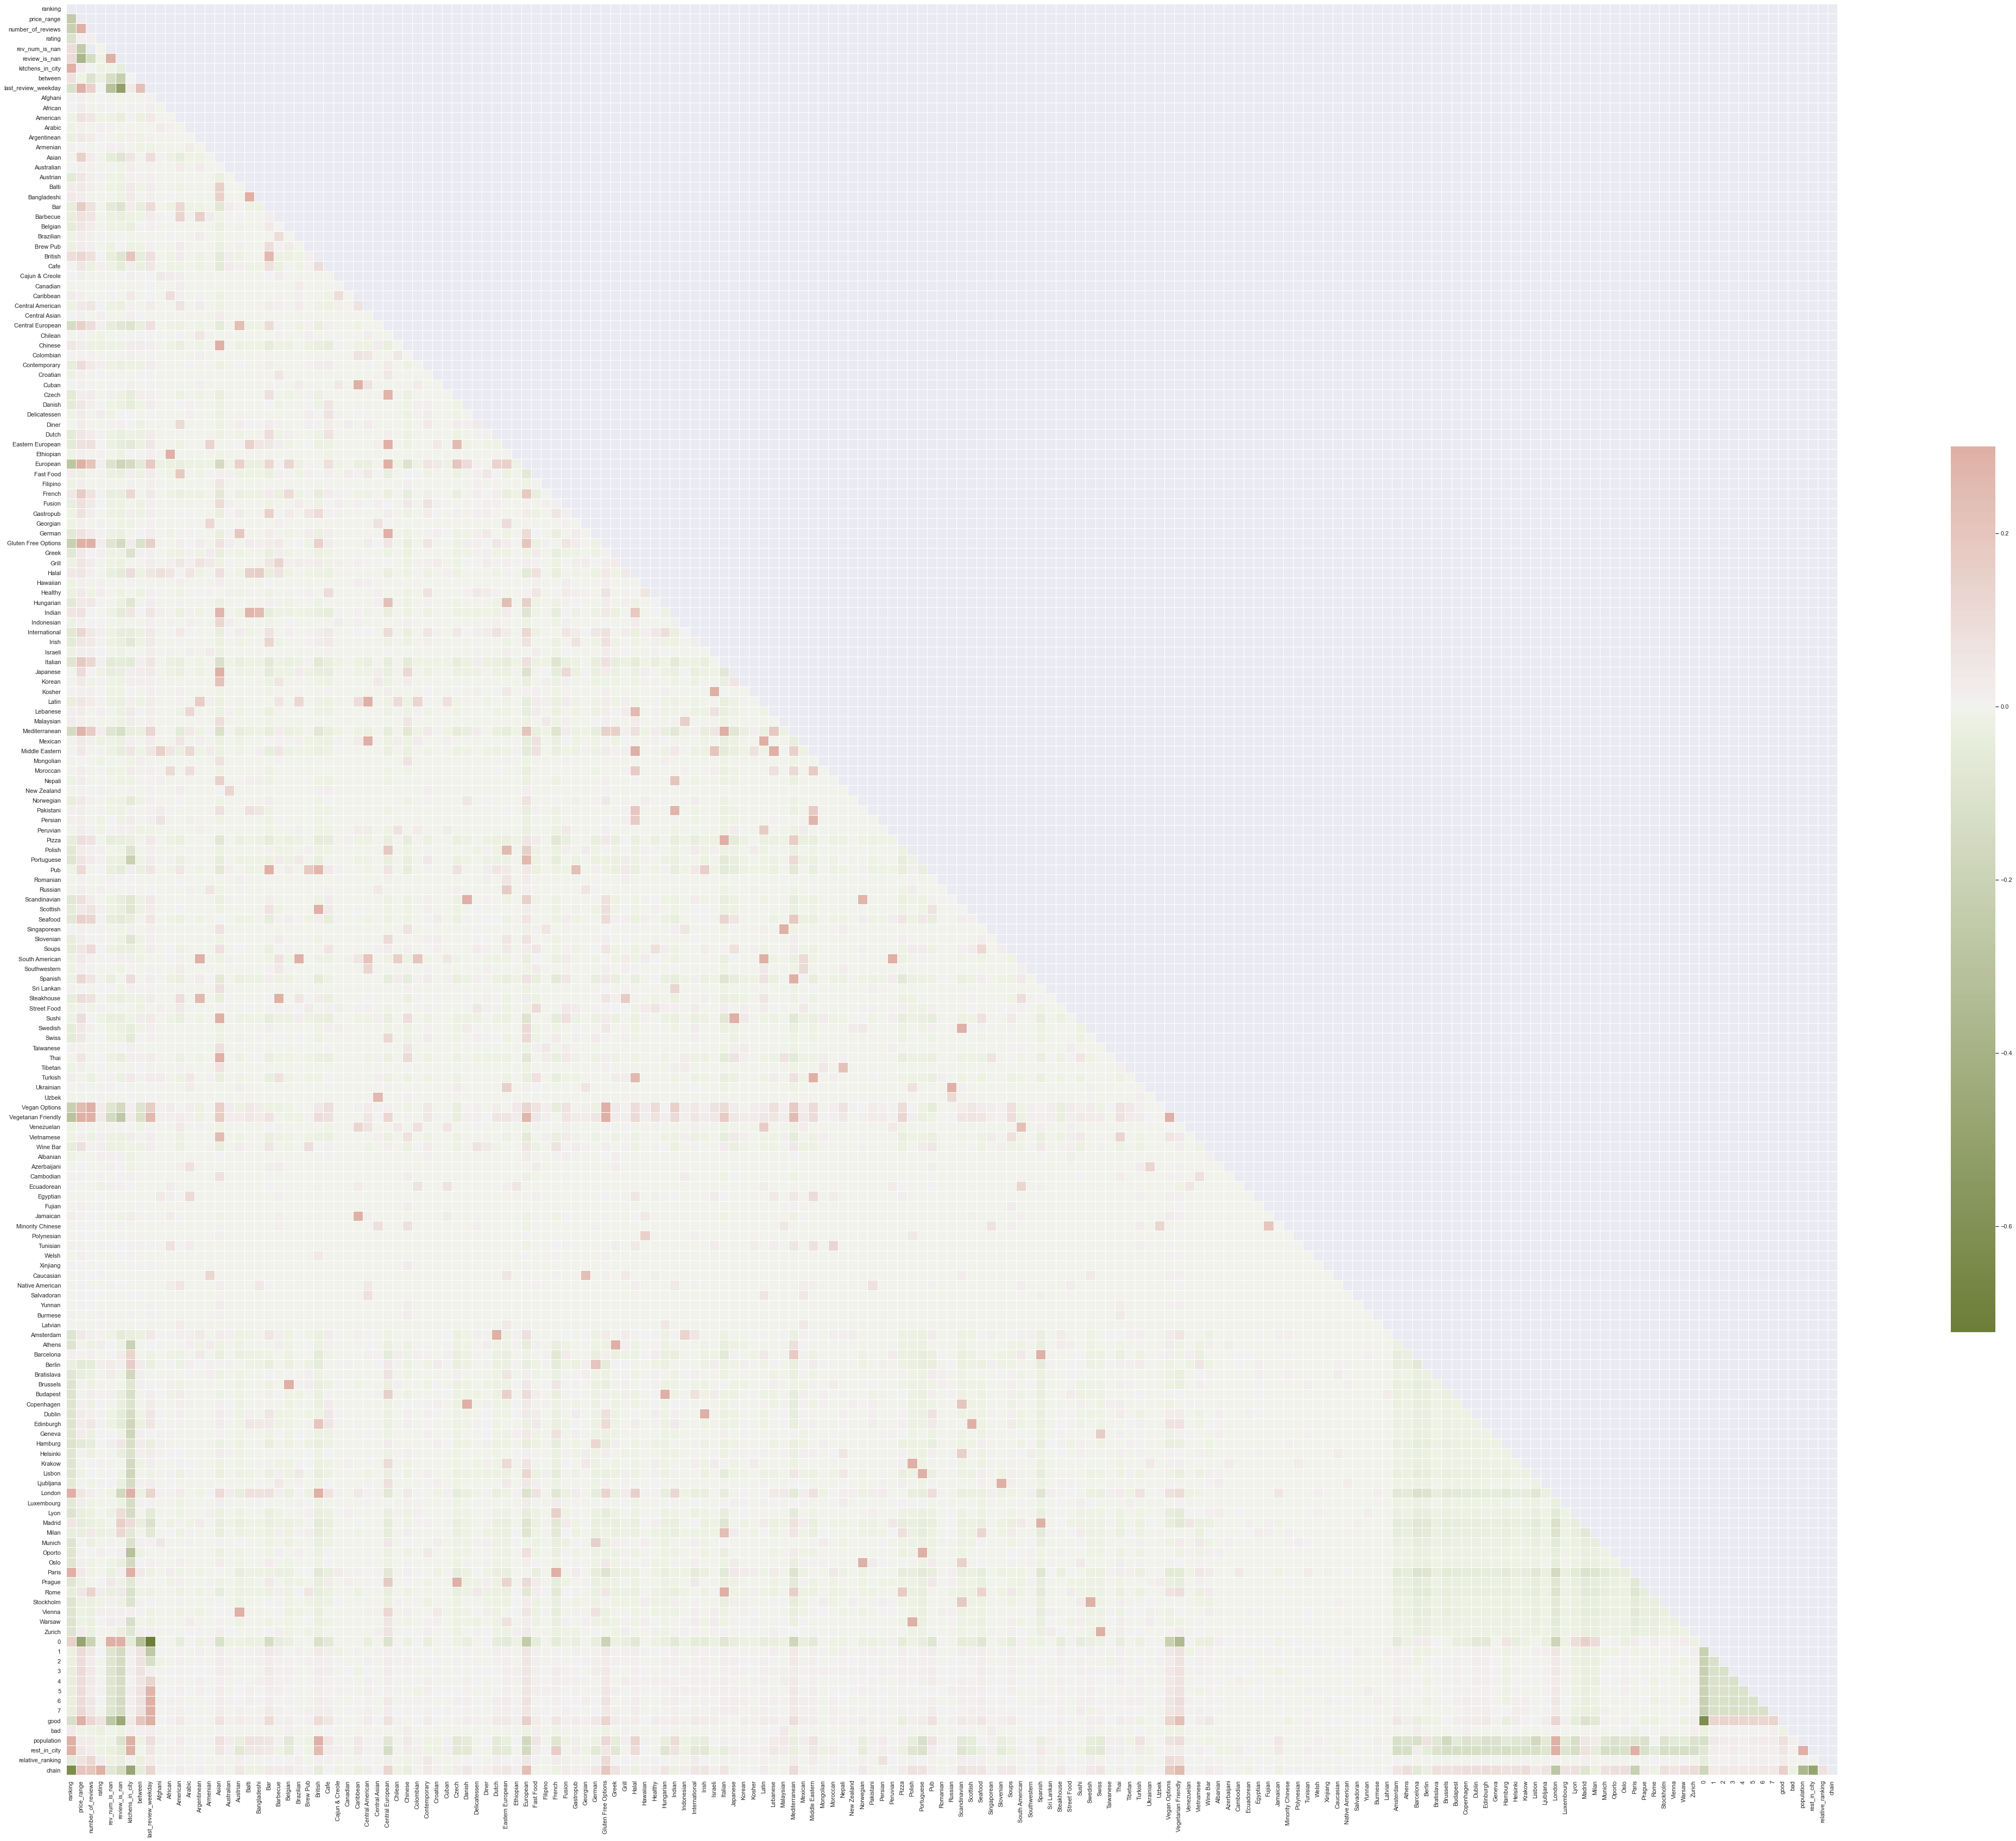

In [97]:
# вновь смотрим - появились ли признаки скоррелироанные с рейтингом
corr = df.drop('kaggle', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(75, 60))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# у рейтинга появилась небольшая скоррелированность с признаком chain

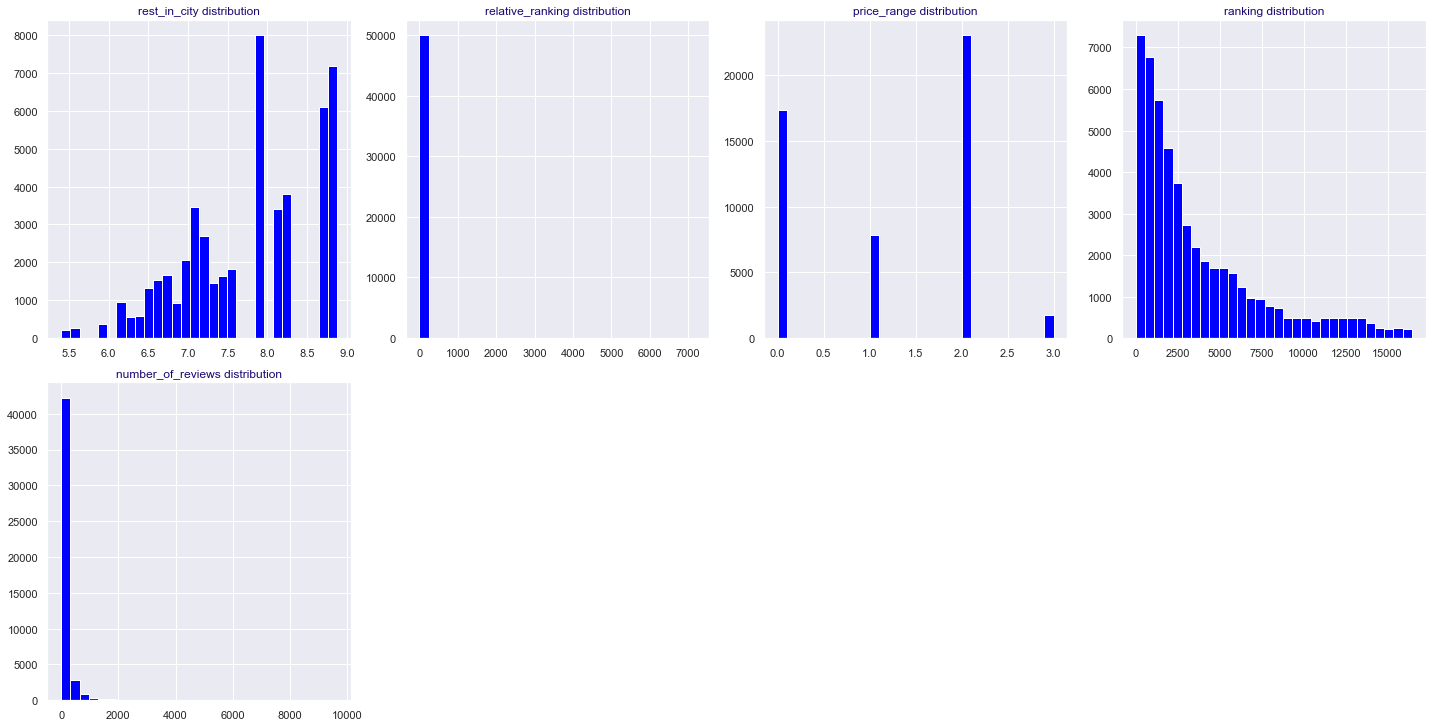

In [105]:
# посмотрим на распределение интересующих нас признаков
num_cols=['rest_in_city','relative_ranking','price_range','ranking', 'number_of_reviews' ]
histograms_plot(df, num_cols, 4, 4, fg1=20, fg2=20, b=30)
# признак кол-во ресторанов в городе распределен ненормально  - нормальизуем его применив к столбцу логарифм

In [ ]:
df.rest_in_city=np.log(df.rest_in_city)

25-й перцентиль: 7.0431599159883405, 75-й перцентиль: 8.717354666338522, IQR: 1.674194750350182,  Границы выбросов: [4.5318677904630675, 11.228646791863795].


[4.5318677904630675, 11.228646791863795]

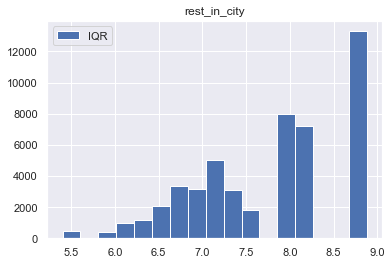

In [110]:
hist_check(df.rest_in_city, b=17, tit='rest_in_city')

In [111]:
# возвращаем список индексов в которых есть выбросы для рейтинга по городу
a = list_outliers(data=df[df.kaggle == 0], iterby='city', param='rating')
# и удаляем строки с этими индексами - даёт небольшой выйгрыш в MAE
df = df.drop(a)
df = df.reset_index(drop=True)

In [112]:
# удалаем колонки с нечисловыми значениями, ненужные колонки, а пропуски заполняем нулями
df = df.drop(['restaurant_id', 'city', 'cuisine_style',
              'reviews', 'URL_TA', 'ID_TA', 'last_review', 'last_review_weekday'], axis=1)
df = df.fillna(0)

In [113]:
# создание полиномиальных признаков
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(df[['price_range', 'ranking', 'number_of_reviews',
                                 'between', 'good', 'bad', 'rest_in_city', 'relative_ranking', 'chain']])

In [114]:
df = pd.concat([df, pd.DataFrame(poly_features)], axis=1, join='inner')

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [115]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df
y = df['rating']

In [116]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [117]:
# фиксируем зерно случайности для повторяемости результатов
RANDOM_SEED = 42
# отберем значения для прогнозирования в test_data
train_data = X.query('kaggle == 0').drop(['kaggle'], axis=1)
test_data = X.query('kaggle == 1').drop(['kaggle'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [118]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [119]:
# Создаём модель
regr = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

c:\users\lvd\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   54.8s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

c:\users\lvd\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [128]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('max_error:', metrics.max_error(y_test, y_pred))
print('median_absolute_error', metrics.median_absolute_error(y_test, y_pred))
print('MPE: ', metrics.mean_absolute_percentage_error(y_test, y_pred))


MAE: 0.20260896508985746
max_error: 2.045
median_absolute_error 0.15000000000000036
MPE:  0.05293030062331342
0.7721833514173306


<AxesSubplot:>

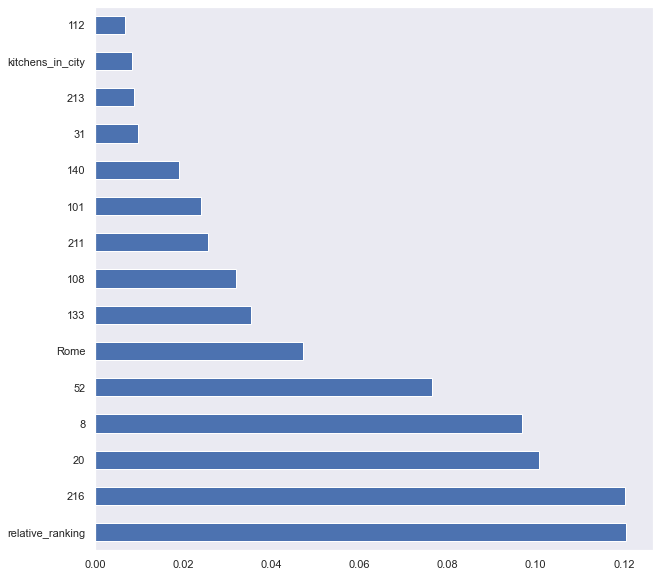

In [121]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [122]:
test_data.sample(1)
train_data.sample(1)


,ranking,price_range,number_of_reviews,rating,rev_num_is_nan,review_is_nan,kitchens_in_city,between,Afghani,African,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Cafe,Cajun & Creole,Canadian,Caribbean,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ethiopian,European,Fast Food,Filipino,French,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Japanese,Korean,Kosher,Latin,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Mongolian,Moroccan,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Portuguese,Pub,Romanian,Russian,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Wine Bar,Albanian,Azerbaijani,Cambodian,Ecuadorean,Egyptian,Fujian,Jamaican,Minority Chinese,Polynesian,Tunisian,...,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219
4451,7561.0,2,2.0,0.0,0,1,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7.301032,32.520236,0.403228,1.796059,8.0,4.322527e+11,114337442.0,0.0,0.0,0.0,4.647851e+08,25669595.0,114337442.0,30244.0,0.0,0.0,0.0,122942.752803,6790.0,30244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499765.919413,27601.550441,122942.752803,1524.404841,6790.0,30244.0,8.0,0.0,0.0,0.0,32.520236,1.796059,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.19572,7.301032,32.520236,0.403228,1.796059,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.379504,29.678909,132.19572,1.639135,7.301032,32.520236,0.090528,0.403228,1.796059,8.0


,ranking,price_range,number_of_reviews,rating,rev_num_is_nan,review_is_nan,kitchens_in_city,between,Afghani,African,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Cafe,Cajun & Creole,Canadian,Caribbean,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ethiopian,European,Fast Food,Filipino,French,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Japanese,Korean,Kosher,Latin,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Mongolian,Moroccan,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Portuguese,Pub,Romanian,Russian,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Wine Bar,Albanian,Azerbaijani,Cambodian,Ecuadorean,Egyptian,Fujian,Jamaican,Minority Chinese,Polynesian,Tunisian,...,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219
17208,13196.0,0,42.0,3.0,0,0,102,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2.297878e+12,7.313645e+09,1.044806e+10,348268832.0,0.0,1.517991e+09,80601168.0,174134416.0,23277744.0,33253920.0,1108464.0,0.0,4.831437e+06,256536.0,554232.0,47505600.0,1583520.0,0.0,6.902053e+06,366480.0,791760.0,52784.0,0.0,230068.424354,12216.0,26392.0,0.0,0.0,0.0,0.0,1.002794e+06,53245.602302,115034.212177,2827.194908,6108.0,13196.0,74088.0,105840.0,3528.0,0.0,15377.413631,816.498333,1764.0,151200.0,5040.0,0.0,21967.733759,1166.42619,2520.0,168.0,0.0,732.257792,38.880873,84.0,0.0,0.0,0.0,0.0,3191.67544,169.46918,366.128896,8.998347,19.440436,42.0,216000.0,7200.0,0.0,31382.476799,1666.323128,3600.0,240.0,0.0,1046.08256,55.544104,120.0,0.0,0.0,0.0,0.0,4559.536343,242.098828,523.04128,12.854781,27.772052,60.0,8.0,0.0,34.869419,1.85147,4.0,0.0,0.0,0.0,0.0,151.984545,8.069961,17.434709,0.428493,0.925735,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,662.45159,35.174356,75.992272,1.867661,4.03498,8.717355,0.099168,0.214246,0.462868,1.0


In [123]:
test_data=test_data.drop('rating', axis=1)

In [124]:
sample_submission=pd.DataFrame()

In [125]:
predict_submission = regr.predict(test_data)
predict_submission = (predict_submission * 2).round()/2

c:\users\lvd\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [126]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv(dataset_dir+'submission.csv', index=False)
sample_submission.head(10)

,Rating
0,3.0
1,4.0
2,4.5
3,4.5
4,4.5
5,4.5
6,3.5
7,4.5
8,4.0
9,4.5
